
## MED 3

# Regresja wielomianowa
Celem laboratorium jest napisanie programu, który pozwoli na wyznaczenie linii trendu dla punktów zebranych z wykresu. Wyznaczenie parametrów modelu ma się odbyć poprzez wykorzystanie pseudoinwersji, która w efekcie swojego działania minimalizuje sumę kwadratów błędu aproksymacji. Aproksymatorem będzie model regresji wielomianowej. 

Wczytanie niezbędnych bibliotek


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 1. Wprowadzenie teoretyczne

Celem regresji wielomianowej jest dopasowanie do danych doświadczalnych/historycznych wykresu funkcji, która oddaje charakter tych danych. 

Zadanie polega na znalezieniu wielomianu $\hat{f}(x)$ postaci:

$$\hat{f}(x)=w_0+w_1 x^1+w_2x^2+ … +w_n x^n,$$

gdzie $x \in R$, a $w∈R^N$ jest wektorem zawierającym współczynniki wielomianu. 

Celem zadania regresji jest znalezienie wektora $w$ (wektor wartości parametrów).

Mając dane historyczne  $X={x_1,x_2,…,x_k}$ oraz odpowiadające im wartości $Y={y_1,y_2,…,y_k}$ będziemy poszukiwać najlepiej dopasowanego wektora $w$. Co to dla nas znaczy?

W efekcie musimy znaleźć takie parametry modelu (wielomianu), które zminimalizują nam sumę kwadratów błędu (SSE). 

Czyli takiego, dla którego wartości zwracane przez funkcję $\hat{f}$ i odpowiadające im wartości rzeczywiste najmniej się różnią. 
Załóżmy że mamy już wybrany wektor np. $w=[1,0.5,0,0,2,0.3,…,1]$ 
możemy obliczyć:

$$\hat{f}(x_1)=w_0 + w_1x_1^1+w_2x_1^2+...+w_nx_1^n$$

$$\hat{f}(x_2)=w_0 + w_1x_2^1+w_2x_2^2+...+w_nx_2^n$$

$$\vdots$$

$$\hat{f}(x_k)=w_0 + w_1x_k^1+w_2x_k^2+...+w_nx_k^n$$

Błąd dopasowania możemy wyliczyć poprzez porównanie wartości otrzymanej dla danego argumentu $\hat{f}(x_i)$ z wartością rzeczywistą $y_i$ odpowiadającą temu argumentowi, stąd mamy

$$e^1=\hat{f}(x_1)−y_1$$
$$e^2=\hat{f}(x_2)−y_2$$
$$\vdots$$
$$e^k=\hat{f}(x_k)−y_k$$


Następnie sumując kwadraty błędów $e^1, … , e^k$ otrzymujemy wartość błędów dla danych parametrów modelu:

$$SSE(w)=\sum_{i=1}^k\left(\hat{f}(x_i)−y_i\right)^2$$

Chcemy aby suma kwadratów błędów była jak najmniejsza dla danego stopnia wielomianu, a to co możemy zmieniać to wartości współczynników wektora $\omega$. 

Powyższe analizy możmy zapisać w postaci macierzowej.
$$ X  w = Y ,$$ gdzie

$$X = \left|\begin{array}{cccc}
1&x_1&...&x_1^n\\
1&x_2&...&x_2^n\\
\vdots&\vdots&\vdots&\vdots\\
1&x_k&...&x_k^n\end{array}\right| $$

$$w = \left|\begin{array}{c}
w_0\\
w_1\\
...\\
w_n\end{array}\right| $$


$$Y = \left|\begin{array}{c}
y_0\\
y_1\\
...\\
y_k\end{array}\right| $$

Ponieważ w ogólnym przypadku macierz $X$ jest macierzą prostokątną, więc nie można jej odwrócić (nie da się wyzerować błędu aproksymacji), za to możemy znaleźć rozwiązanie przybliżone (takie, które minimalizuje nasz błąd):

$$\min_w||Xw−Y||_2^2$$

Rozwiązaniem, które jest w stanie zminimalizować nam sumę kwadratów błędu jest równanie:

$$ w=X^+Y,$$ 

gdzie $X^+$ jest pseudoodwrotnością macierzy $X$.

# 2. Od korelacji do prostej regresji liniowej

Miara korelacji (Pearsona) pozwala na stwierdzenie stopnia zależności liniowej atrybutów (cech). Dla przypomnienia - zbiór `iris`

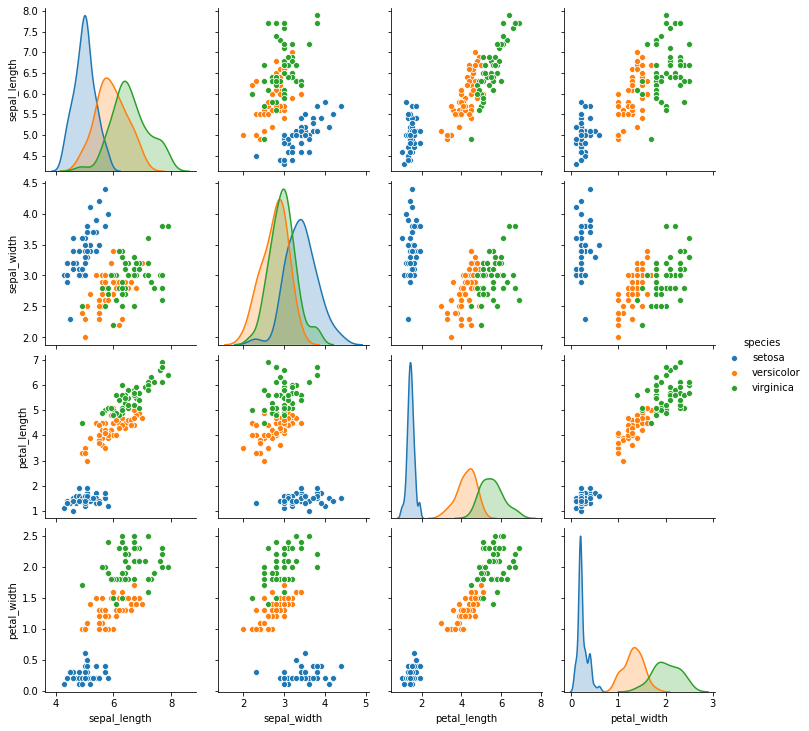

<AxesSubplot:>

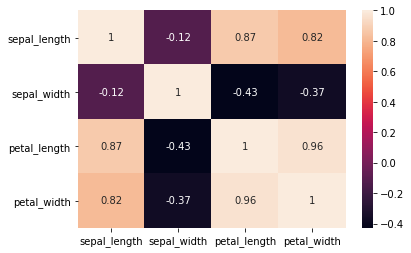

In [2]:
from seaborn import load_dataset
iris = load_dataset("iris")
iris.head()
sns.pairplot(iris, kind="scatter", hue = "species")
plt.show()
sns.heatmap(iris.corr(),annot = iris.corr())

> **Zadanie** Wskaż atrybuty najbardziej i najmniej skorelowane

Najbardziej skorelowane są atrybuty petal_width-petal_length, najmniej - para sepal_width-sepal_length.

Miara korelacji Pearsona odpowiada na pytanie *$czy$* (w jakim stopniu) dane atrybuty ($x,y$) są od siebie zależne liniowo. Odpowiedzi na pytanie *$jak$* od siebie zależą, udzieli model regresyjny. W tym przypadku będzie badany najprostszy model regresji wielomianowej tj. prosta regresja liniowa. Jej wynikiem jest linia prosta $$\hat y = \hat{f}(x) = w_0 + w_1 \cdot x,$$ która pozwala na oszacowanie wartości atrybutu $y$ na podstawie atrybutu $x$. 

Przykład - tworzenie modelu regresyjnego zależności czwartego atrybutu (petal width) od pierwszego (sepal length). Metoda `iloc` umożliwia odwołanie do elementów ramki danych przez ich indeksy, `values` konwertuje wynikową ramkę danych na postać wektora, `reshape` zamienia wektor na macierz o jednej kolumnie. `T` oznacza transpozycję, dzięki której łatwiej zmieścić wydruk w oknie.

In [11]:
x = iris.iloc[:,0].values.reshape(-1,1)
y = iris.iloc[:,3].values.reshape(-1,1)
print(x.T)
print(y.T)

[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
  6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
  6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
  5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
  6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
  6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
  6.7 6.7 6.3 6.5 6.2 5.9]]
[[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
  0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
  0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
  1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
  1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
  1.2 1.4 1

Tworzenie modelu regresyjnego.

In [12]:
regressor = LinearRegression()  
regressor.fit(x,y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Parametrami prostego modelu liniowego $\hat y = \hat{f}(x) = w_0 + w_1 \cdot x$ są $w_0$ (intercept) oraz $w_1$ (slope). W naszym modelu są one równe odpowiednio

In [16]:
# w0
print(regressor.intercept_)
# w1
print(regressor.coef_)


[-3.200215]
[[0.75291757]]


Znając funkcję $\hat{f}(x)$ modelu liniowego możemy dla wektora $x$ wyznaczyć przewidywane wartości $y$, które dla odróżnienia od rzeczywistych zostaną umieszczone w innym wektorze ($y_{pred}$).

In [6]:
y_pred = regressor.predict(x)
y_pred.T

array([[0.63966461, 0.48908109, 0.33849758, 0.26320582, 0.56437285,
        0.86553988, 0.26320582, 0.56437285, 0.11262231, 0.48908109,
        0.86553988, 0.41378933, 0.41378933, 0.03733055, 1.16670691,
        1.09141515, 0.86553988, 0.63966461, 1.09141515, 0.63966461,
        0.86553988, 0.63966461, 0.26320582, 0.63966461, 0.41378933,
        0.56437285, 0.56437285, 0.71495636, 0.71495636, 0.33849758,
        0.41378933, 0.86553988, 0.71495636, 0.94083163, 0.48908109,
        0.56437285, 0.94083163, 0.48908109, 0.11262231, 0.63966461,
        0.56437285, 0.18791406, 0.11262231, 0.56437285, 0.63966461,
        0.41378933, 0.63966461, 0.26320582, 0.79024812, 0.56437285,
        2.07020799, 1.61845745, 1.99491623, 0.94083163, 1.6937492 ,
        1.09141515, 1.54316569, 0.48908109, 1.76904096, 0.71495636,
        0.56437285, 1.24199866, 1.31729042, 1.39258218, 1.01612339,
        1.84433272, 1.01612339, 1.16670691, 1.46787393, 1.01612339,
        1.24199866, 1.39258218, 1.54316569, 1.39

Wizualizacja danych i prostej regresji.

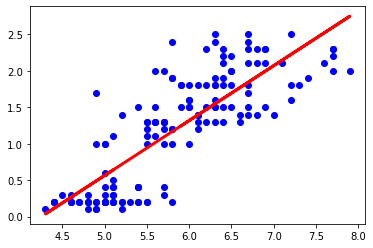

In [7]:
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()

Jakość modelu możemy ocenić wykorzystując np. bład średniokwadratowy: 

In [8]:
e = metrics.mean_squared_error(y, y_pred)
e

0.19101500769427363

> **Zadanie** Napisz funkcję, która zwróci parametry $w_0$ oraz $w_1$ modelu prostej regresji liniowej oraz wartość bładu średniokwadratowego $e$ dopasowania. Argumentem będzie ramka danych oraz numery dwóch atrybutów.

In [9]:
def regression_result(frame, atr1, atr2):
    x = frame.iloc[:,atr1].values.reshape(-1,1)
    y = frame.iloc[:,atr2].values.reshape(-1,1)
    regressor = LinearRegression()  
    regressor.fit(x,y) 
    # w0
    print(regressor.intercept_)
    # w1
    print(regressor.coef_)
    y_pred = regressor.predict(x)
    print(metrics.mean_squared_error(y, y_pred))
    return;

regression_result(iris, 0, 3)

[-3.200215]
[[0.75291757]]
0.19101500769427363


> **Zadanie** Korzystając z powyższej funkcji oceń modele regresyjne dla poszczególnych par atrybutów. Dla których par błąd dopasowania (wariancja) modelu jest największa, a dla których - najmniejsza. Czy można zauwazyć zależność tej miary od miary korelacji ?

In [10]:
regression_result(iris, 0, 1)
regression_result(iris, 0, 2)
regression_result(iris, 1, 2)
regression_result(iris, 1, 3)
regression_result(iris, 2, 3)
print(iris)

[3.41894684]
[[-0.0618848]]
0.1861043758938136
[-7.10144337]
[[1.85843298]]
0.7430610341321241
[9.06315061]
[[-1.73522152]]
2.5272893400281986
[3.15687229]
[[-0.64027659]]
0.49976926485227013
[-0.36307552]
[[0.41575542]]
0.04206730919499318
     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica


Największa wariancja dla atrybutów 1-2 (wyróżniają się najsłabszą korelacją), najmniejsza dla 2-3 (również posiadają najwyższy stopień korelacji).

# 3. Błąd uczenia i generalizacji

Sprawdzenie skuteczności modelu regresyji wymaga wcześniejszego podziału zbioru danych na (w najprostszym przypadku) dwa podzbiory: uczący i testowy. Pierwszy jest wykorzystywany do wyznaczeniu parametrów modelu, drugi - do testowania otrzymanego modelu. Błąd predykcji dla zbioru uczącego to błąd uczenia, określający stopień dopasowania modelu do znanych danych (danych uczących). Błąd predykcji dla zbioru testowego pokazuje przydatność modelu do przewidywania dla danych, które nie zostały wykorzystane w procesie uczenia. Pokazuje on na ile model jest ogólny tzn. sprawdza się dla dowolnych danych danego procesu i dlatego jest nazywany błędem generalizacji.

Zbiór `dane10` zawiera dane charakteryzujące się dwoma atrybutami opisującymi (cechami) należące do trzech klas. Każda klasa definiuje jeden podzbiór danych. Podzbiory te wykorzystamy do badania modeli regresyjnych.

<IPython.core.display.Javascript object>


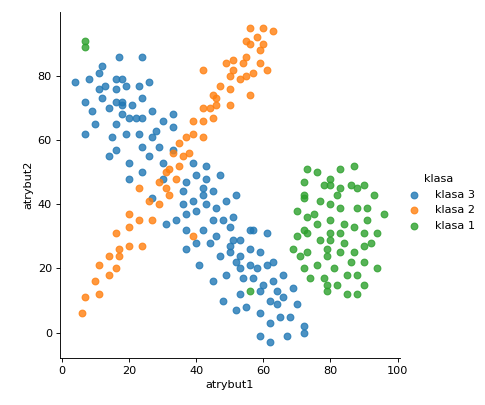

In [28]:
d = pd.read_csv('dane10.csv')
sns.lmplot( x="atrybut1", y="atrybut2", data=d, fit_reg=False, hue='klasa', legend=True)

Wybieramy podzbiór `klasa 3` i generujemy modeli liniowy.

In [12]:
dd = d[d.klasa == 'klasa 3']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)
print(x.T)
print(y.T)

[[61 66 69 72 62 62 59 55 52 48 45 37 40 41 34 37 31 27 20 14  7  4 17 26
  33 43 47 52 57 63 70 72 67 59 53 59 56 49 51 49 47 46 45 43 40 36 37 33
  30 24 30 36 39 33 18 24 30 27 23 16  7 10 20  9 15 24 12 16 19 24 29 26
  21 18 20 16 16 11 11  8 12 14 18 13 18 16 19 23 22 28 27 24 68 64 64 66
  65 63 59 62 61 58 60 57 56 56 51 53 53 50 48 45 43 42 42 40 39 37 42 44
  46 50 50 52 53 54]]
[[31 18 14  2 -3  3 -1  8  7 10 16 32 28 21 35 26 34 42 48 55 62 78 86 78
  68 52 49 43 32 22  9  0 -1  6 12 25 32 18 36 41 24 39 44 48 49 40 47 64
  53 50 48 44 53 57 79 73 66 69 77 57 72 65 53 69 61 86 83 79 77 67 58 55
  71 68 67 72 76 76 81 79 73 70 71 77 72 65 62 62 67 63 61 58  5  9 13 11
   5 16 13 10 21 20 15 17 21 26 29 24 29 33 35 35 40 45 43 38 41 37 32 28
  30 27 25 22 20 17]]


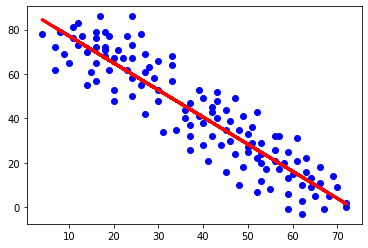

In [13]:
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()


> **Zadanie** Obejrzyj modele dla podzbiorów należących do innych klas. Zwróć szczególną uwage na klasę nr 1.

Badanie modeli regresyjnych z podziałem na zbiór uczący i testowy

In [49]:
x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

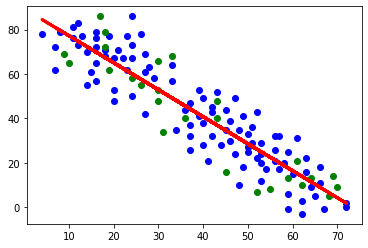

błąd uczenia 97.90961693115158
błąd generalizacji 109.05710100604452


In [16]:
regressor = LinearRegression()  
regressor.fit(x_ucz,y_ucz) 
y_pred_ucz = regressor.predict(x_ucz)
e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
y_pred_test = regressor.predict(x_test)
e_test = metrics.mean_squared_error(y_test, y_pred_test)
plt.scatter(x_ucz, y_ucz, color='blue')
plt.scatter(x_test, y_test, color='green')
plt.plot(x_ucz, y_pred_ucz, color='red', linewidth=3)
plt.show()
print('błąd uczenia',e_ucz)
print('błąd generalizacji',e_test)

> **Zadanie** Zbadaj błąd uczenia i generalizacji dla wszystkich trzech klas, dla każdej kilkukrotnie powtarzając podział zbioru na uczący i testowy. Oceń stabilość modeli tj. zmienność parametrów modelu dla różnych podziałów. Dla których klas uzyskane modele sa bardziej, a dla których - mniej stabilne? Dlaczego?

In [27]:
for i in range(1, 4):

    dd = d[d.klasa == 'klasa ' + str(i)]
    x = dd.iloc[:,0].values.reshape(-1,1)
    y = dd.iloc[:,1].values.reshape(-1,1)
    print("klasa " + str(i))
    for j in range(0, 3):
        
        x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=j)
        regressor = LinearRegression()  
        regressor.fit(x_ucz,y_ucz) 
        y_pred_ucz = regressor.predict(x_ucz)
        e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
        y_pred_test = regressor.predict(x_test)
        e_test = metrics.mean_squared_error(y_test, y_pred_test)
        print('błąd uczenia',e_ucz)
        print('błąd generalizacji',e_test)


klasa 1
błąd uczenia 143.7605900852357
błąd generalizacji 195.55161262816824
błąd uczenia 157.46975060274795
błąd generalizacji 145.0444534364505
błąd uczenia 131.27805869695464
błąd generalizacji 233.79459697297048
klasa 2
błąd uczenia 48.45425790798866
błąd generalizacji 10.180715401260002
błąd uczenia 41.63244168612218
błąd generalizacji 37.52277611819982
błąd uczenia 25.047016662503548
błąd generalizacji 101.8608311809229
klasa 3
błąd uczenia 97.90961693115158
błąd generalizacji 109.05710100604452
błąd uczenia 117.74438392608673
błąd generalizacji 33.063579082352526
błąd uczenia 99.93213036113795
błąd generalizacji 106.36792163429439


# 4. Estymacja parametrów regresji wielomianowej

W przypadku regresji liniowej linia trendu jest linią prostą - jest to szczególny, najprostszy przypadek. W przypadku ogólnym jest to krzywa opisana wielomianem. Współczynniki tego wielomianu mogą być wyznaczane z wykorzystaniem pseudoinwersji, która w efekcie swojego działania minimalizuje sumę kwadratów błędu aproksymacji lub poprzez metody iteracyjnej optymalizacji, szukając minimum funkcji błędu poprzez przybliżenie wartości parametrów modelu w każdym kolejnym kroku. Zostało to opisane we wprowadzeniu. Celem tej części laboratorium będzie napisanie programu, który pozwoli na wyznaczenie linii trendu dla punktów zebranych interaktywnie z wykresu. Aproksymatorem będzie w tym przypadku model regresji wielomianowej.  

> **Zadanie** Przy pomocy poniższego kodu wskaż 30 punktów klikając na wykresie tak, by układały się w linię trendu. W efekcie wykonanie poniższego kodu i zebrania punktów otrzymamy ramkę danych z kolumnami x i y. 

<IPython.core.display.Javascript object>


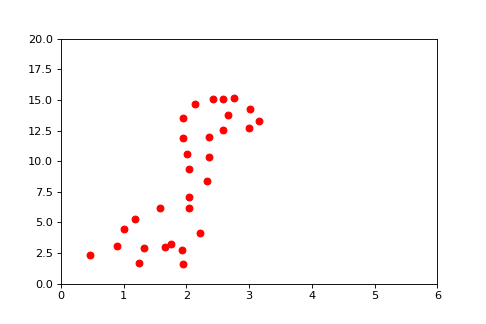

In [89]:
%matplotlib notebook
ile_probek = 30
ile_razy_wiecej = 0
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis([0, 6, 0, 20])

xx = []
yy = []
df = []

def onclick(event):
    global xx, yy, df
    ix, iy = event.xdata, event.ydata
    print( 'x = %d, y = %d'%(ix, iy))
    ax.plot(ix,iy,'ro')
    xx.append(ix)
    yy.append(iy)
    if len(xx) == ile_probek:
        fig.canvas.mpl_disconnect(cid)
        if (ile_razy_wiecej > 0):
            xx_org = xx
            yy_org = yy
            for i in range(1,ile_razy_wiecej):
                print(i)
                xx = np.concatenate((xx,xx_org+np.random.rand(len(xx_org))/2),axis=0)
                yy = np.concatenate((yy,yy_org+np.random.rand(len(yy_org))/2),axis=0)                
        df = pd.DataFrame({'x': xx, 'y': yy})
cid = fig.canvas.mpl_connect('button_press_event', onclick)

W efekcie udało się pozyskać następującą macierz (ramkę) danych:

In [90]:
print(df.info())
df.head(ile_probek)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       30 non-null     float64
 1   y       30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None


,x,y
0,0.472173,2.310982
1,0.902280,3.046818
2,1.009807,4.426508
3,1.189018,5.254323
4,1.583284,6.174117
5,2.049233,7.093911
6,2.049233,9.393396
7,2.013391,10.589128
8,1.941707,11.876840
9,1.941707,13.532469


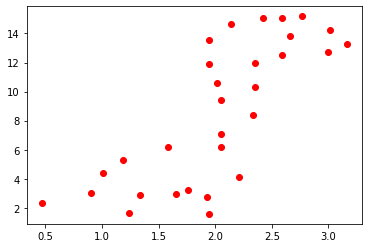

In [91]:
%matplotlib inline
plt.scatter(df.x, df.y, color = 'red')
plt.show()

> **Zadanie** Napisz funkcję, która utworzy macierz $X$. Macierz $X$ powinna składać się z wektora jednostkowego oraz wektorów zawierających poszczególne potęgi zebranych argumentów (opis we wprowadzeniu). Funkcja ta może tworzyć macierz wykorzystując jako parametr wejściowy stopień wielomianu, którym będziemy chcieli dokonywać aproksymacji.

In [92]:
def create_van(df, st):
    matr = np.ones( (df.size, st+1) )
    
    matr[:, 1] = df
    for i in range(2, st+1):
        matr[:, i] = matr[:, i-1] * matr[:, i-1]
    #with np.printoptions(precision=3, suppress=True):
        #print(matr)
    return (matr)

#stopien = 4
#create_van(df.x, stopien)

> **Zadanie** Przy pomocy funkcji pakietu _numpy_ wyliczającej pseudoinwersję _np.linalg.pinv()_ oraz mnożenia macierzy _np.dot()_ wylicz parametry modelu dla zbioru uczącego.

In [93]:
x = df.iloc[:,0].values.reshape(-1, 1)
y = df.iloc[:,1].values.reshape(-1, 1)

x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(x_ucz,y_ucz)
print(np.dot(np.linalg.pinv(create_van(x_ucz.reshape(-1), 1)), y_ucz))


[[-2.06878611]
 [ 5.29547268]]


> **Zadanie** 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów stopnia 1, 2, 3, 4 i 5.
2. Wyświetl wykres średniokwadratowego błędu dopasowania krzywej do punktów danych, w funkcji złożoności modelu (stopnia wielomianu). Czym się ta funkcja charakteryzuje?


[-3.07336225  5.74623787]
[-0.1694302   2.27269484  0.91611361]
[  9.22395919 -15.50040337   8.88137303  -0.35182376]
[ 2.94916559e+00 -3.80930256e-01  6.62706575e-02  3.68613894e-01
 -2.70263462e-03]
[-3.99994014e-01  8.92229280e+00 -6.22325849e+00  1.05783767e+00
 -7.67647713e-03  1.86209294e-07]


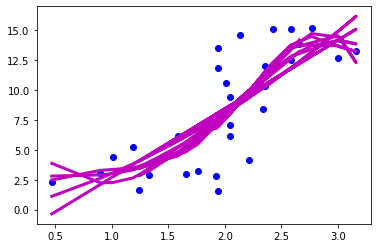

[0.47217256 0.90228009 1.00980697 1.18901844 1.58328367 2.04923349
 2.04923349 2.0133912  1.94170661 1.94170661 2.13883923 2.42557758
 2.5868679  2.76607937 3.01697543 3.16034461 2.99905428 2.5868679
 2.35389299 2.35389299 2.33597185 2.04923349 2.21052382 1.76249514
 1.65496826 1.33238762 1.24278188 1.94170661 1.92378547 2.65855249]


In [94]:
x = np.array(df.x)
y = np.array(df.y)
plt.scatter(x, y, color='blue')

for i in range (1, 6):  
    ploting = np.zeros(x.size)
    coefs = np.dot(np.linalg.pinv(create_van(x.reshape(-1), i)), y)
    print(coefs)
    for j in range(0, x.size):
        mode = x[j]
        ploting[j] = coefs[0];
        for k in range(1, i+1):
            ploting[j]+=coefs[k]*mode
            mode *=mode 
    plt.plot(x, ploting, color='m', linewidth=3)
    
plt.show()
print(x)

> **Zadanie** Znajdź funkcję wbudowaną pakietu `numpy`, która zwraca wartości współczynników wielomianu dla zadanych punktów (czyli realizuje to co powyżej udało się zrobić "ręcznie").

In [95]:
#metoda polyfit
x = np.array(df.iloc[:,0])
y = np.array(df.iloc[:,1])
print(np.polyfit(x, y, 2))
print(np.dot(np.linalg.pinv(create_van(x, 2)),y))

[ 0.91611361  2.27269484 -0.1694302 ]
[-0.1694302   2.27269484  0.91611361]


> **Zadanie** Podziel zbiór na uczący i testowy, a następnie powtórz wcześniejszy eksperyment z uwzględnieniem tego podziału. W szczególności: 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów kilku wybranych stopni wyznaczonych dla zbioru uczącego.
2. Wyświetl wykres błędu uczenia (tj. dopasowania punktów zbioru uczącego) i generalizacji (tj. dopasowania punktów na podstawie zbioru testowego) w funkcji złożoności modelu (stopnia wielomianu).
3. Wybierz stopień wielomianu, który najlepiej opisuje Twoje punkty danych z uwzględnieniem podziału na zbiór uczący i testowy. Co należy uwzględnić dokonując takiego wyboru?

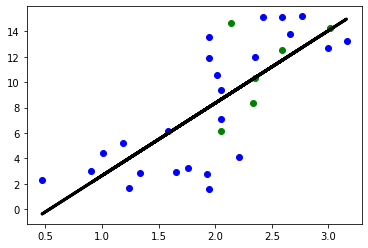

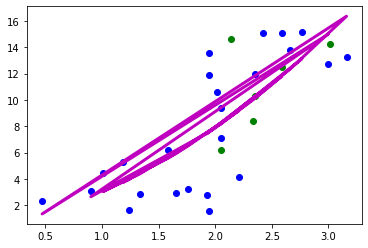

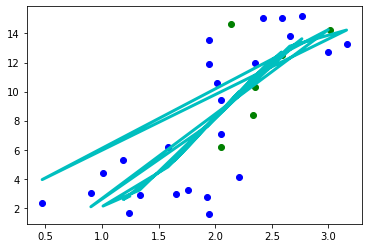

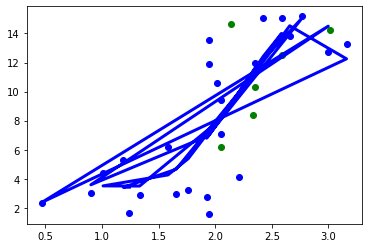

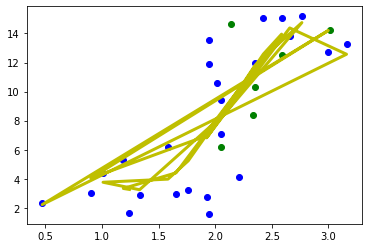

[6.743687841961503, 7.149403168817283, 6.84089528298487, 7.906022566241444, 7.927806534102928]


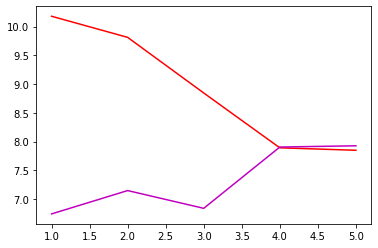

In [98]:
x = np.array(df.iloc[:,0])
y = np.array(df.iloc[:,1])

x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
regressor = LinearRegression()  
regressor.fit(x_ucz.reshape(-1, 1), y_ucz.reshape(-1, 1))
y_pred_ucz = regressor.predict(x_ucz.reshape(-1, 1))
e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
y_pred_test = regressor.predict(x_test.reshape(-1, 1))

error_v = []
variance = []
for i, col in zip( range(1, 6), ['k', 'm', 'c', 'b', 'y'] ):  
    plt.scatter(x_ucz, y_ucz, color='blue')
    plt.scatter(x_test, y_test, color='green')
    coefs = np.polyfit(x_ucz, y_ucz, i)
    vec = np.poly1d(coefs)
    plt.plot(x_ucz, vec(x_ucz), color=col, linewidth=3)
    error_v.append(metrics.mean_squared_error(y_ucz, vec(x_ucz)))
    coefs_test = np.polyfit(x_test, y_test, i)
    vec_test = np.poly1d(coefs)
    variance.append(metrics.mean_squared_error(y_test, vec_test(x_test)))
    plt.show()
plt.plot(range(1, 6), error_v, 'r')
print(variance)
plt.plot(range(1, 6), variance, 'm')
plt.show()

Dokonując wyboru stopnia wielomianu należy zwrócić uwagę na zachowanie biasu oraz wariancji, a mianowicie "złapać" taki stopień, kiedy bias już jest dość mały, a wariancja jeszcze nie jest zbyt wysoka. Więc, dla mojego zbioru jest to stopień 4. 

> **Zadanie** Odpowiedz na następujące pytania sprawdzające:
1. Czy jesteśmy w stanie zminimalizować błąd uczenia do 0, jeśli tak to jaki warunek musi być spełniony?
2. Czy powinniśmy tak dobierać stopień wielomianu aby błąd uczenia był jak najmniejszy?
3. Czy równanie zawsze posiada rozwiązanie przybliżone?
4. Co się dzieje z wielkością parametrów modelu w miarę zwiększania stopnia wielomianu?

1. Nie, jesteśmy z stanie znaleźć jedynie minimalny błąd - w przypadku znalezienia najlepszych parametrów modelu, kiedy jest najdokładniejszy. Nie mamy jednak żadnego wpływu na szumy. 
2. Ze zwiększeniem stopnia wielomianu maleje błąd uczenia, ale rośnie wariancja - funkcja staje się bardziej i bardziej dynamiczna, dlatego dążymy do tego, żeby "uchwycić się" za optymalny stopień wielomianu, kiedy bład uczenia już jest mały, a wariancja jeszcze nie rośnie.
3. Nie zawsze. Kiedy stopień wielomianu jest równy wielkości zbioru, wtedy mamy rozwiązanie dokładne, bo wielomian przechodzi przez wszyskie próbki.
4. Przy zwiększeniu stopnia wielomianu maleje SRR, co oznacza, że różnica między oszacowanymi wartościami i rzeczywistymi staje się co raz mniejsza, aż do tego momentu jak dojdzie do 0 - to oznaczało by, że zbiór parametrów modelu przybliża rozwiązanie na tyle dobrze, aby przejść przez wszystkie punkty zbioru próbek.